In [1]:
#Mostrar cuantas imagenes tengo de cada categoria en train
!ls /content/drive/MyDrive/emociones/angry | wc -l #5013
!ls /content/drive/MyDrive/emociones/disgusted | wc -l #557
!ls /content/drive/MyDrive/emociones/fearful | wc -l #5131
!ls /content/drive/MyDrive/emociones/happy | wc -l #8989
!ls /content/drive/MyDrive/emociones/neutral | wc -l #6208
!ls /content/drive/MyDrive/emociones/sad | wc -l #6077
!ls /content/drive/MyDrive/emociones/surprised | wc -l #4032

5013
557
5131
8989
6208
6077
4032


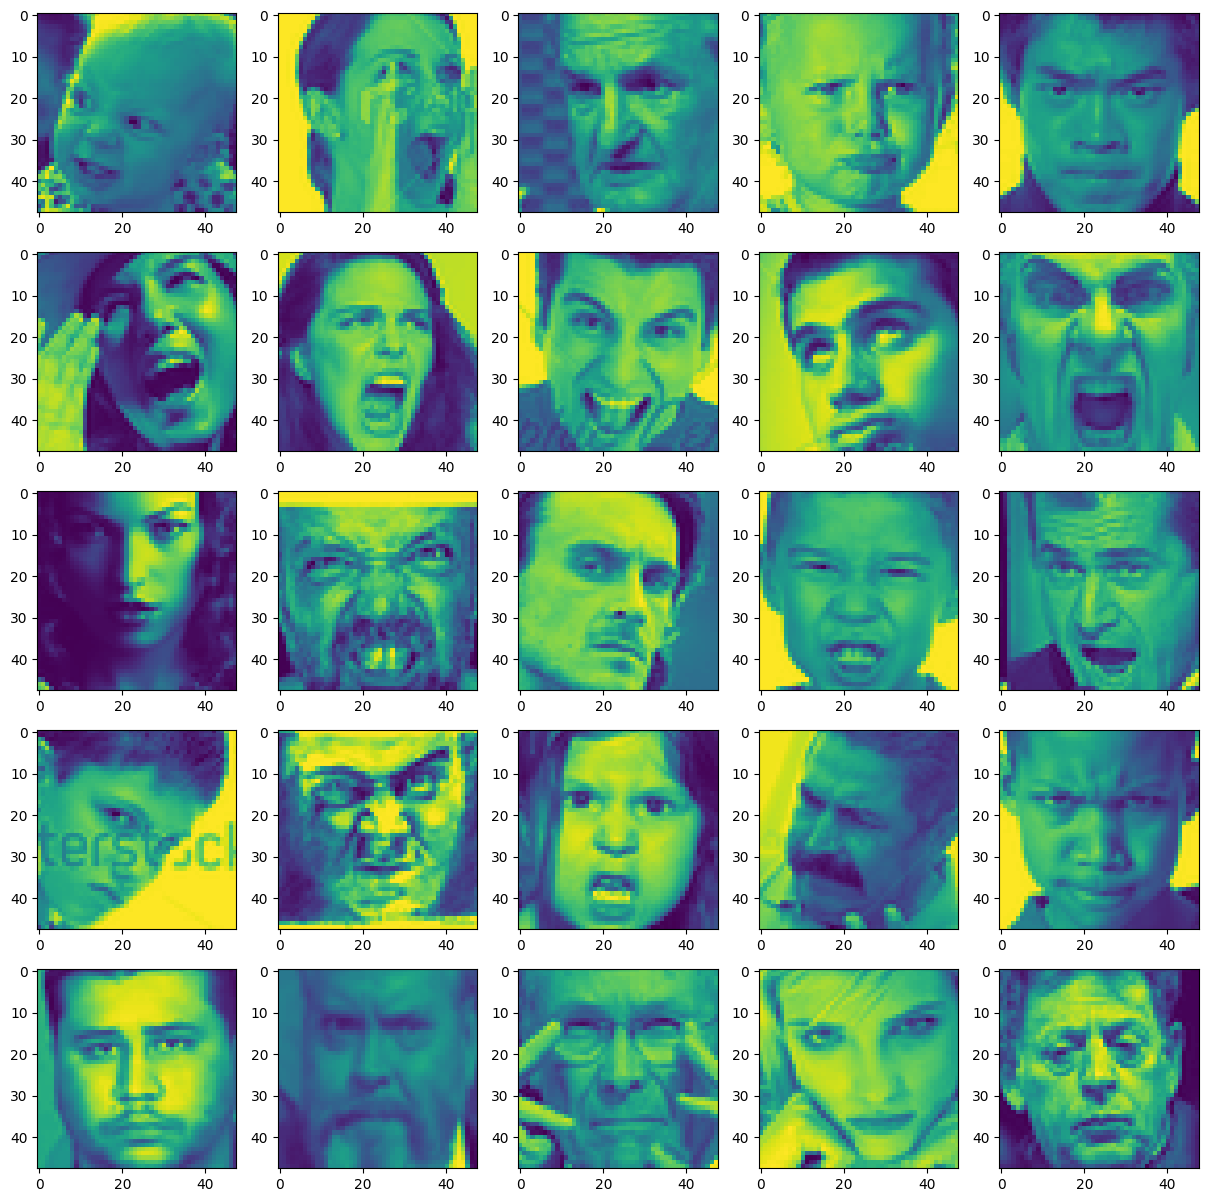

In [2]:
#mostrar algunas imágenes con pyplot
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = '/content/drive/MyDrive/emociones/angry'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate (imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

In [3]:
!mkdir dataset
!mkdir dataset/angry
!mkdir dataset/disgusted
!mkdir dataset/fearful
!mkdir dataset/happy
!mkdir dataset/neutral
!mkdir dataset/sad
!mkdir dataset/surprised

In [4]:
#copiar imagenes que subimos a carpetas del dataset
#Limitar para que todos tengan la misma cantidad de imagenes
#Maximo 436(el min. numero de imagenes que subí)
import shutil
carpeta_fuente = '/content/drive/MyDrive/emociones/angry'
carpeta_destino = '/content/dataset/angry'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate (imagenes):
  if i <557:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [5]:
#copiar imagenes que subimos a carpetas del dataset
#Limitar para que todos tengan la misma cantidad de imagenes
#Maximo 436(el min. numero de imagenes que subí)
import shutil
carpeta_fuente = '/content/drive/MyDrive/emociones/disgusted'
carpeta_destino = '/content/dataset/disgusted'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate (imagenes):
  if i <557:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [6]:
#copiar imagenes que subimos a carpetas del dataset
#Limitar para que todos tengan la misma cantidad de imagenes
#Maximo 436(el min. numero de imagenes que subí)
import shutil
carpeta_fuente = '/content/drive/MyDrive/emociones/fearful'
carpeta_destino = '/content/dataset/fearful'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate (imagenes):
  if i <557:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [7]:
#copiar imagenes que subimos a carpetas del dataset
#Limitar para que todos tengan la misma cantidad de imagenes
#Maximo 436(el min. numero de imagenes que subí)
import shutil
carpeta_fuente = '/content/drive/MyDrive/emociones/happy'
carpeta_destino = '/content/dataset/happy'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate (imagenes):
  if i <557:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [8]:
#copiar imagenes que subimos a carpetas del dataset
#Limitar para que todos tengan la misma cantidad de imagenes
#Maximo 436(el min. numero de imagenes que subí)
import shutil
carpeta_fuente = '/content/drive/MyDrive/emociones/neutral'
carpeta_destino = '/content/dataset/neutral'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate (imagenes):
  if i <557:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [9]:
#copiar imagenes que subimos a carpetas del dataset
#Limitar para que todos tengan la misma cantidad de imagenes
#Maximo 436(el min. numero de imagenes que subí)
import shutil
carpeta_fuente = '/content/drive/MyDrive/emociones/sad'
carpeta_destino = '/content/dataset/sad'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate (imagenes):
  if i <557:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [10]:
#copiar imagenes que subimos a carpetas del dataset
#Limitar para que todos tengan la misma cantidad de imagenes
#Maximo 436(el min. numero de imagenes que subí)
import shutil
carpeta_fuente = '/content/drive/MyDrive/emociones/surprised'
carpeta_destino = '/content/dataset/surprised'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate (imagenes):
  if i <557:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [11]:
#Mostrar cuantas imagenes tengo de cada categoria en el dataset
!ls /content/dataset/angry | wc -l
!ls /content/dataset/disgusted | wc -l
!ls /content/dataset/fearful | wc -l
!ls /content/dataset/happy | wc -l
!ls /content/dataset/neutral | wc -l
!ls /content/dataset/sad | wc -l
!ls /content/dataset/surprised | wc -l

557
557
557
557
557
557
557


Found 3122 images belonging to 7 classes.
Found 777 images belonging to 7 classes.


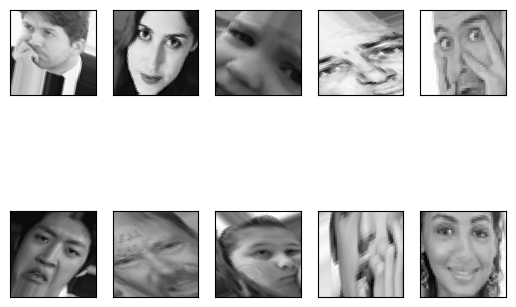

In [12]:
#Aumento de datos con ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale = 1. /255,
    rotation_range = 30,
    width_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5, 1.5],
    validation_split = 0.2 #el 20% para pruebas
)
#Generadores para sets de entrenamiento y pruebas
data_gen_entrenamiento = datagen.flow_from_directory('/content/dataset', target_size=(224,224), batch_size=32,
                                                     shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory('/content/dataset',target_size=(224,224),  batch_size=32,
                                                     shuffle=True, subset='validation')

#imprimir 10 imágenes del generador de entrenamiento
for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()

In [13]:
import tensorflow as tf
import tensorflow_hub as hub

url = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4'  # URL correcta
mobilenetv2 = hub.KerasLayer(url, input_shape=(224, 224, 3))

In [14]:
mobilenetv2.trainable = False

In [15]:
modelo = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(7, activation='softmax')
])

In [16]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              3540265   
                                                                 
 dense (Dense)               (None, 7)                 7014      
                                                                 
Total params: 3547279 (13.53 MB)
Trainable params: 7014 (27.40 KB)
Non-trainable params: 3540265 (13.51 MB)
_________________________________________________________________


In [17]:
#Compilar como siempre
modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [19]:
#Entrenar el modelo
EPOCAS = 30

historial = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas
)

Epoch 1/30
98/98 [==============================] - 212s 2s/step - loss: 1.7615 - accuracy: 0.3184 - val_loss: 1.7999 - val_accuracy: 0.2960
Epoch 2/30
98/98 [==============================] - 209s 2s/step - loss: 1.7857 - accuracy: 0.3152 - val_loss: 1.8908 - val_accuracy: 0.2523
Epoch 3/30
98/98 [==============================] - 250s 3s/step - loss: 1.8038 - accuracy: 0.3152 - val_loss: 1.8898 - val_accuracy: 0.2896
Epoch 4/30
98/98 [==============================] - 208s 2s/step - loss: 1.7384 - accuracy: 0.3363 - val_loss: 1.8058 - val_accuracy: 0.3282
Epoch 5/30
98/98 [==============================] - 250s 3s/step - loss: 1.7665 - accuracy: 0.3225 - val_loss: 1.8231 - val_accuracy: 0.2960
Epoch 6/30
98/98 [==============================] - 208s 2s/step - loss: 1.7839 - accuracy: 0.3177 - val_loss: 1.8904 - val_accuracy: 0.2883
Epoch 7/30
98/98 [==============================] - 205s 2s/step - loss: 1.7623 - accuracy: 0.3222 - val_loss: 1.8853 - val_accuracy: 0.2819
Epoch 8/30
98

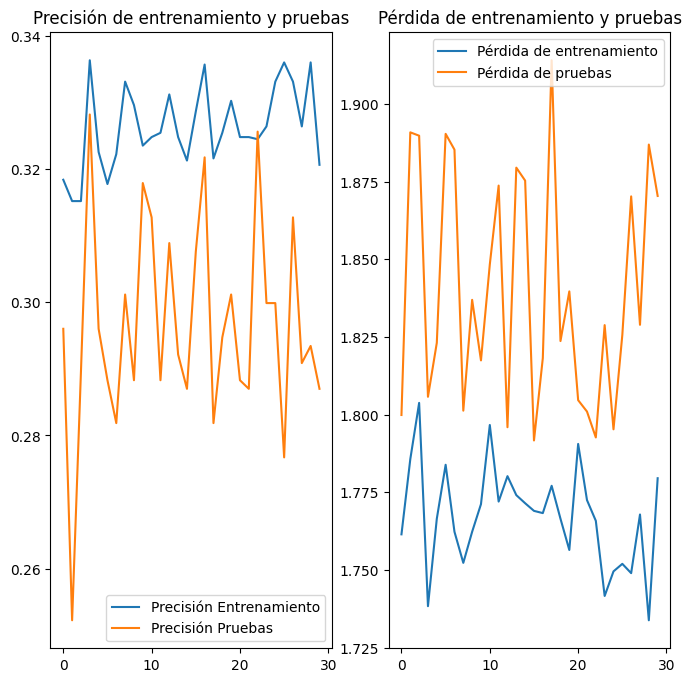

In [20]:
#Graficas de precisión
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(30)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

In [57]:
#Categorizar una imagen de internet
from PIL import Image
import requests
from io import BytesIO
import cv2

def categorizar(url):
  respuesta = requests.get(url)
  img = Image.open(BytesIO(respuesta.content))
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediccion[0], axis=-1)
#0 = angry, 1 = disgusted, 2 = fearful, 3 = happy, 4 = neutral, 5 = sad, 6=surprised
# fearful: https://www.lavanguardia.com/files/image_449_220/files/fp/uploads/2015/12/17/5fa2909e12727.r_d.496-279-4526.jpeg
# neutral: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS5gvF9yBMhurbpPRQdKfMLE8HCI_sDHJvgNw&usqp=CAU
# sad: https://images.pexels.com/photos/7202038/pexels-photo-7202038.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1%27
# surprised: https://i.pinimg.com/originals/3e/7c/a3/3e7ca3751af7319ff5cd68f997bb512f.jpg


url = 'https://i.pinimg.com/originals/3e/7c/a3/3e7ca3751af7319ff5cd68f997bb512f.jpg' #debe ser 5
prediccion = categorizar (url)
print(prediccion)

1/1 [==============================] - 0s 48ms/step
6
